In [9]:
from google.colab import drive
drive.mount('/content/mydrive/')
%cd /content/mydrive/MyDrive/LTSF_Linear

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).
/content/mydrive/MyDrive/LTSF_Linear


In [10]:
import os
from glob import glob
import pandas as pd
import json
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
root_path = "dataset/Water_Week"
dir_list = sorted(os.listdir(root_path))

# Lineplot

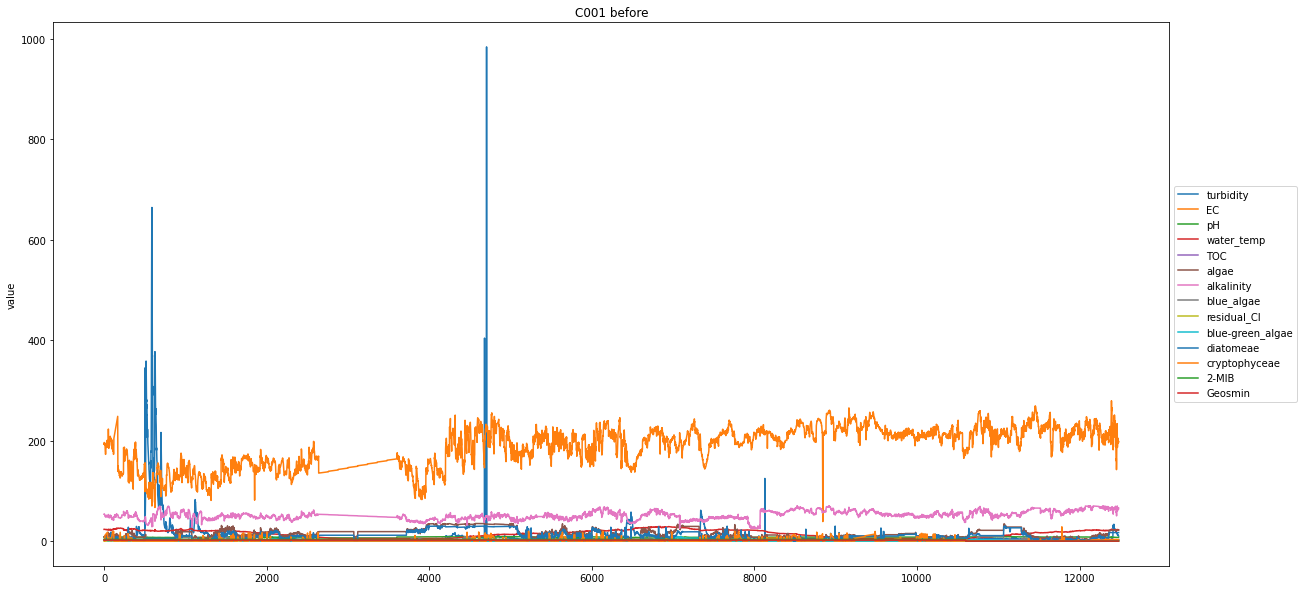

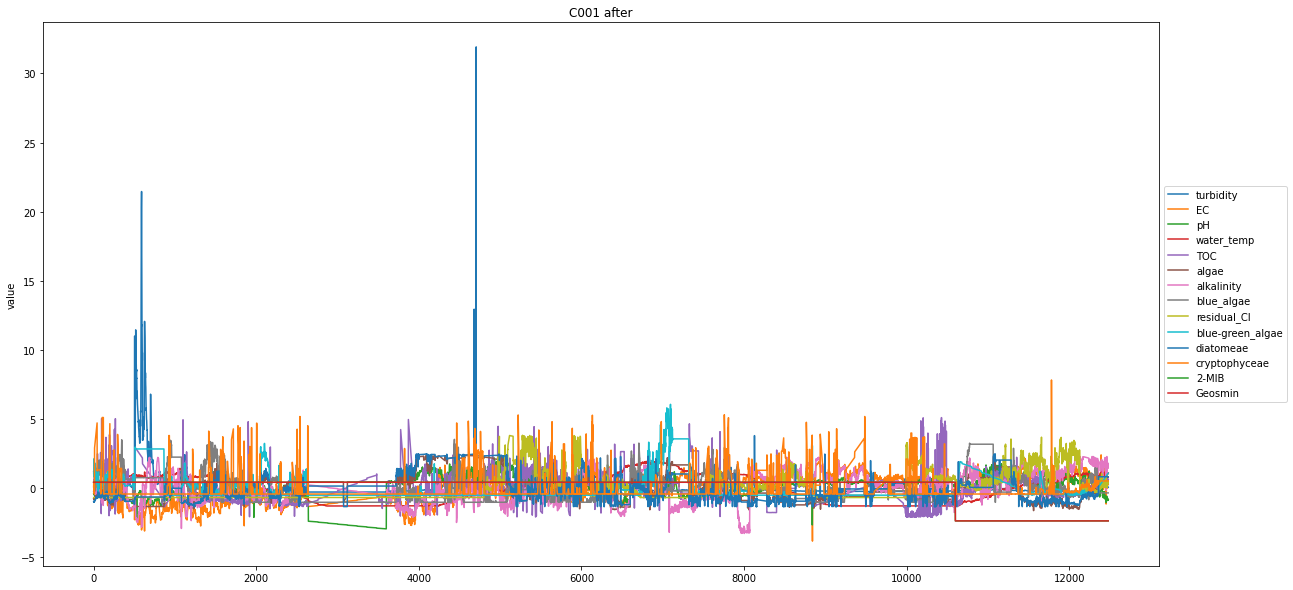

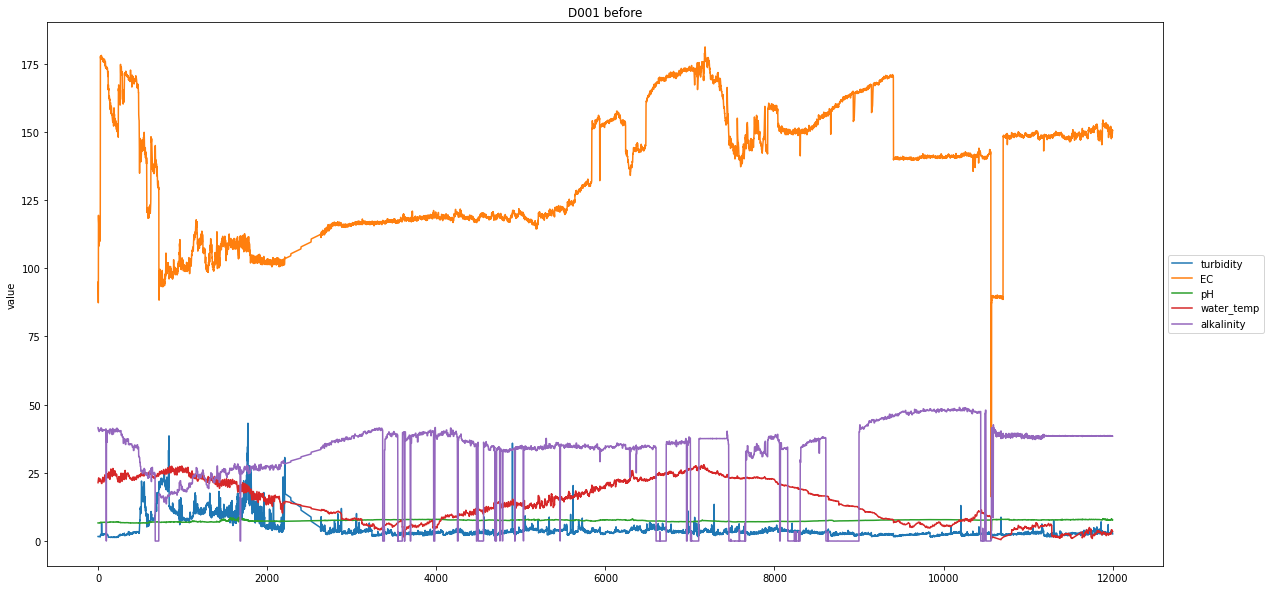

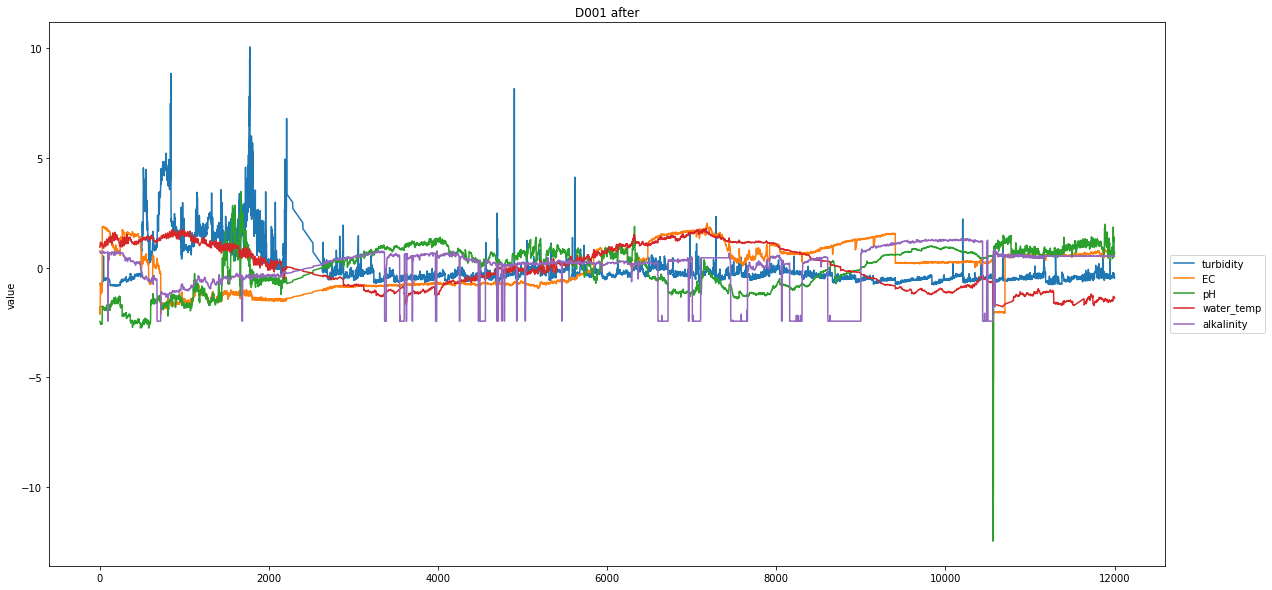

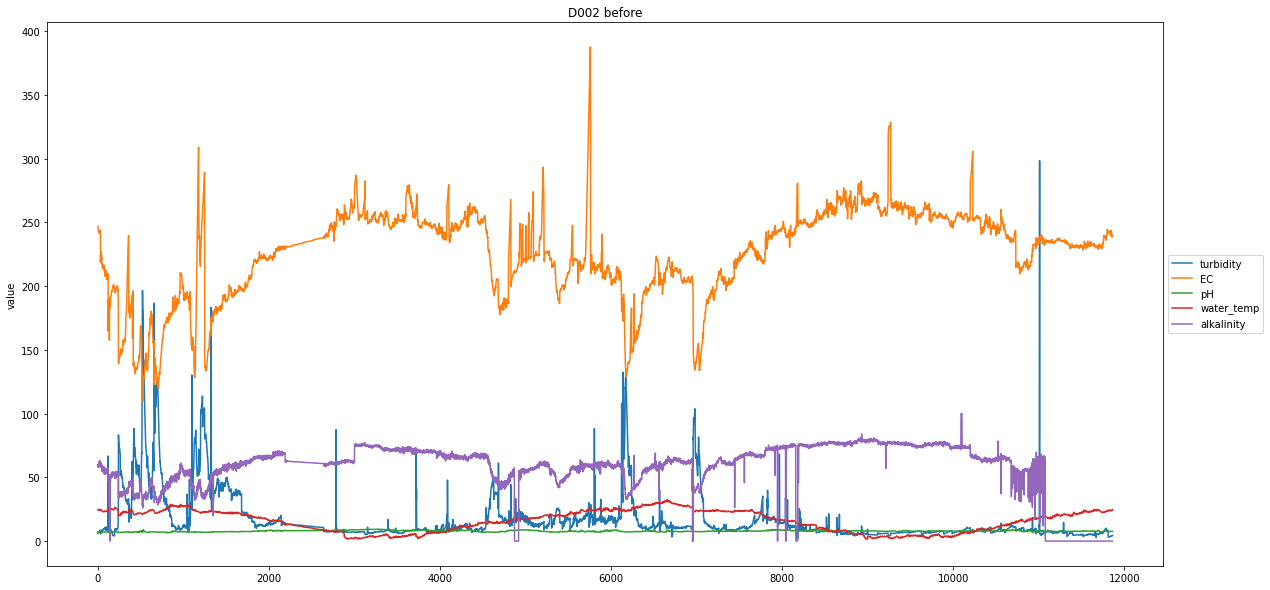

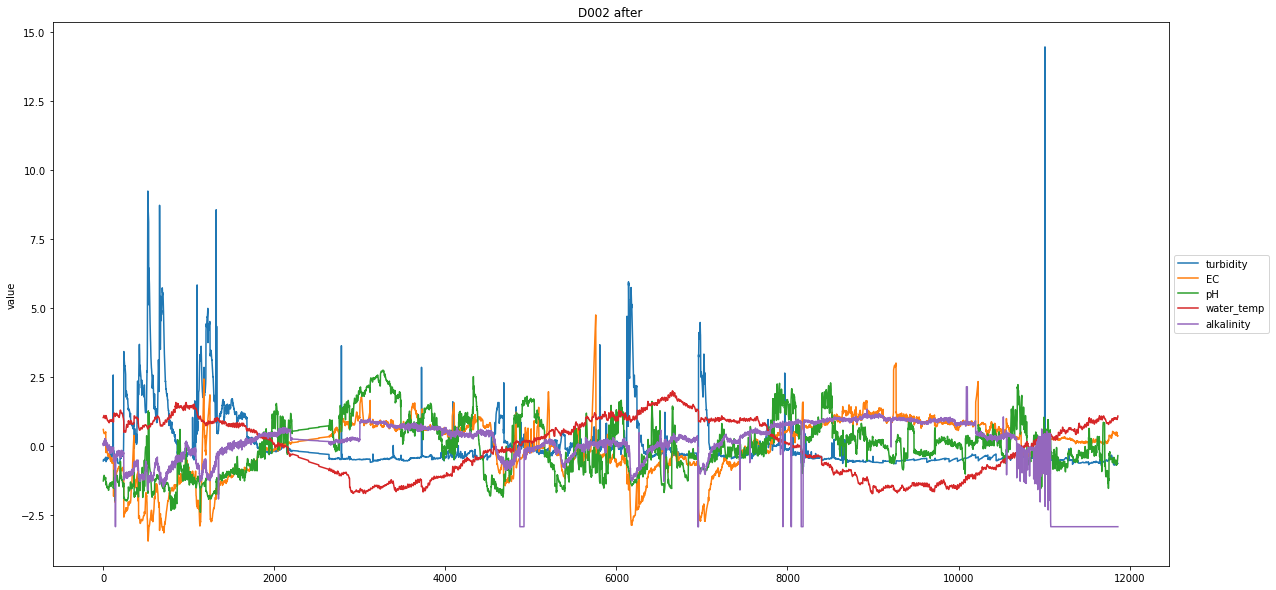

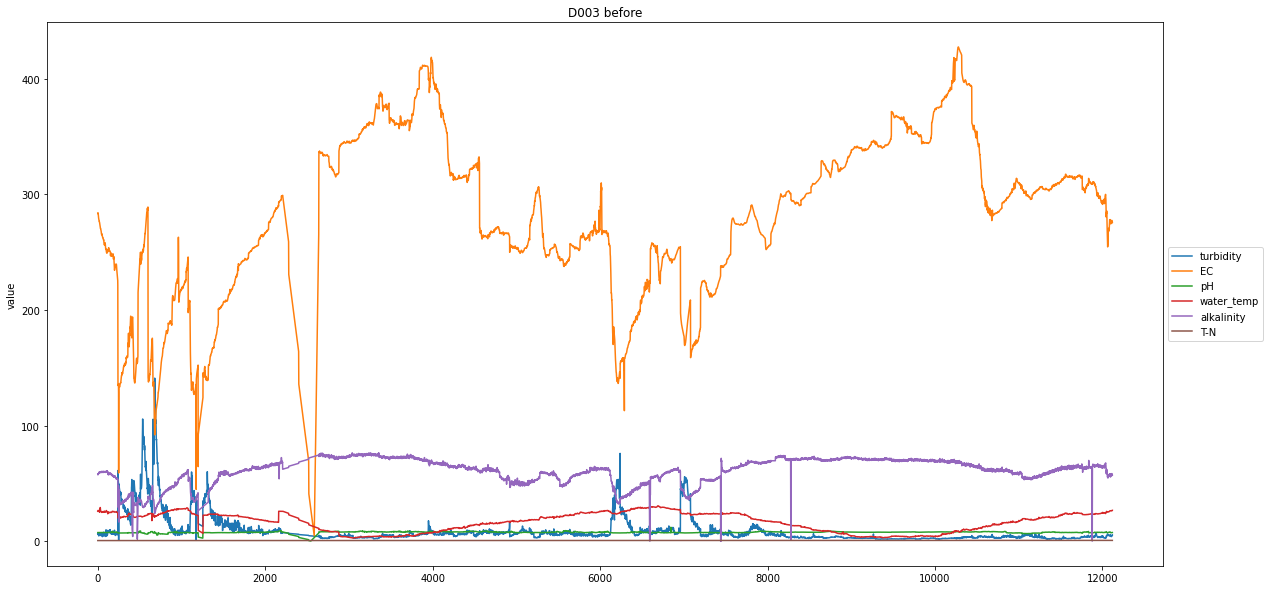

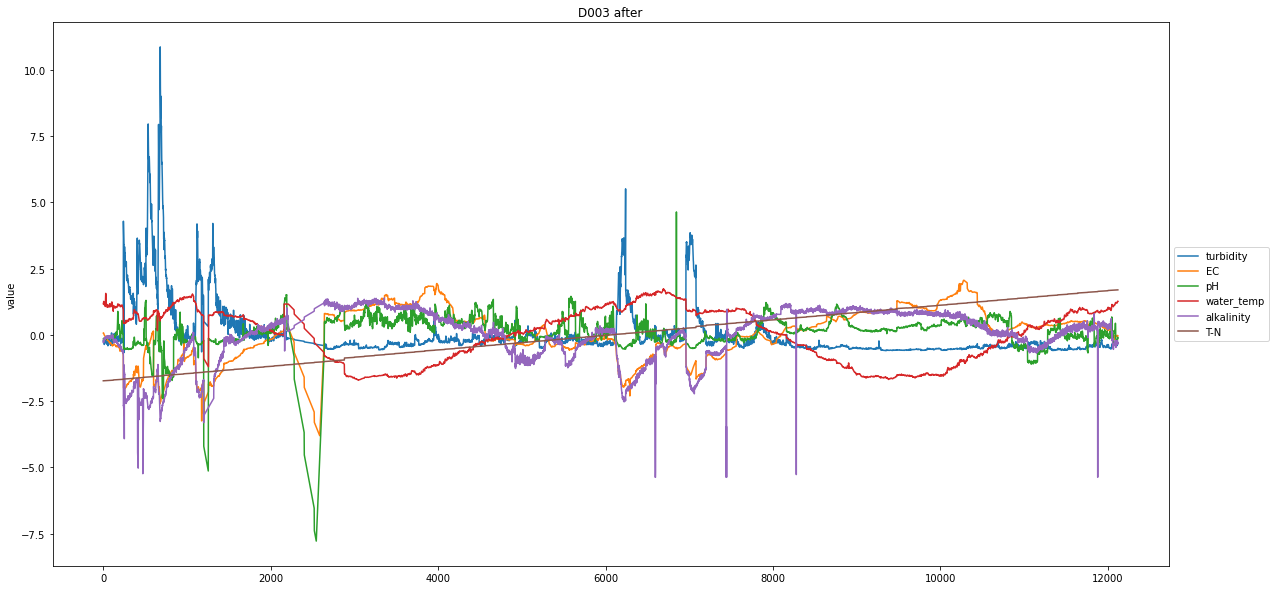

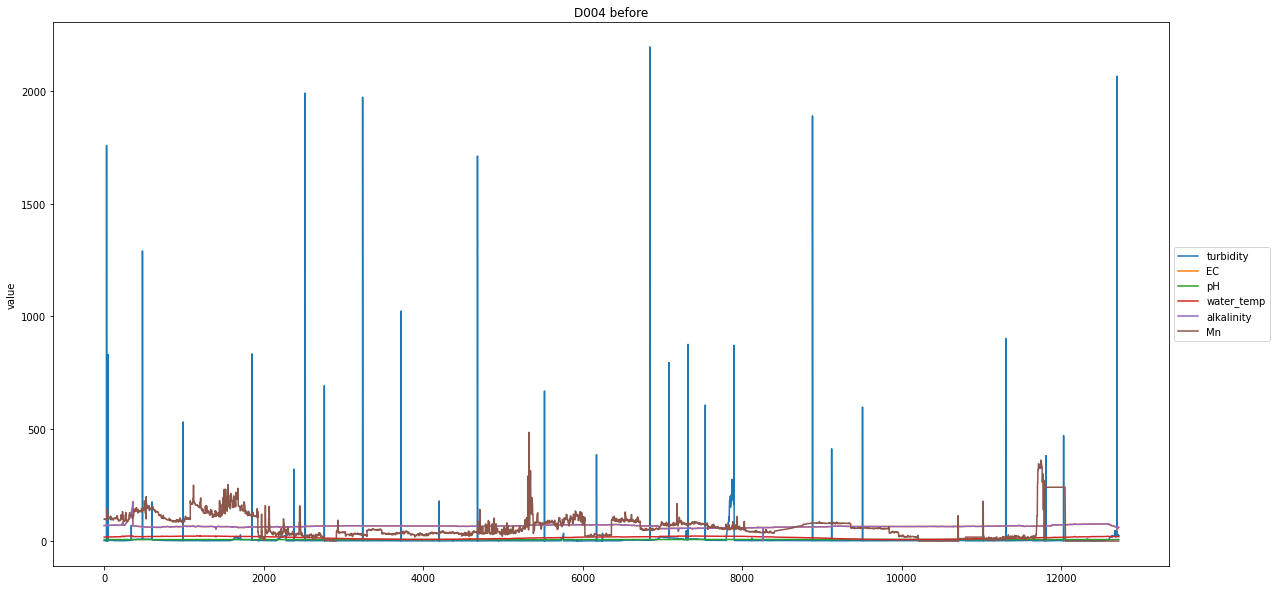

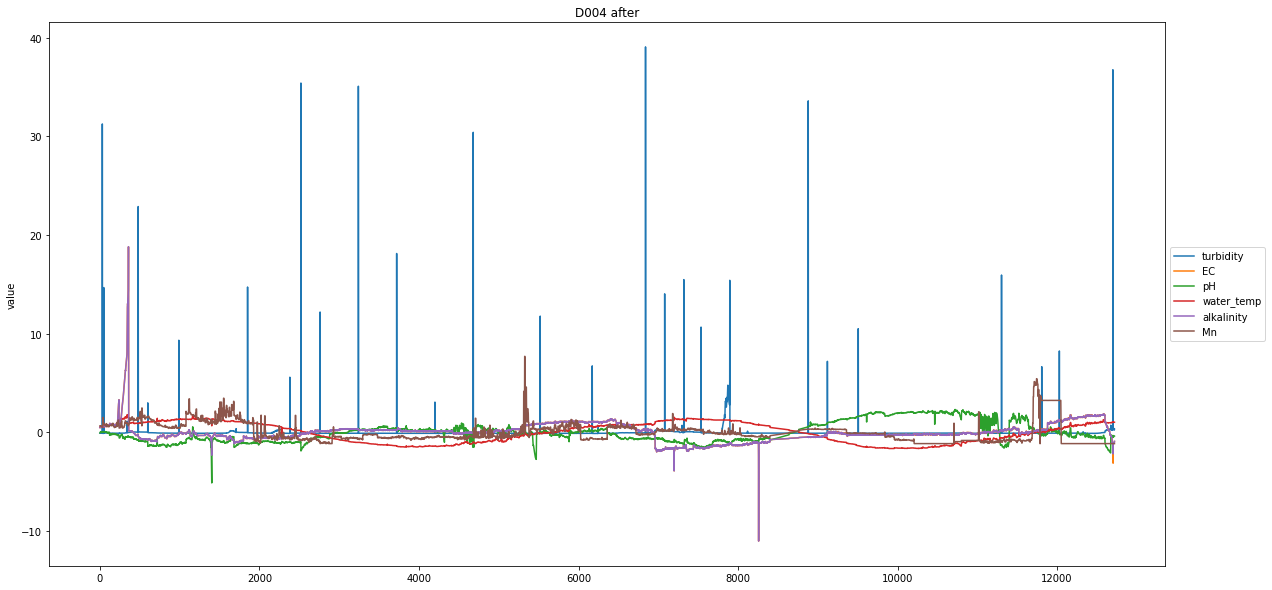

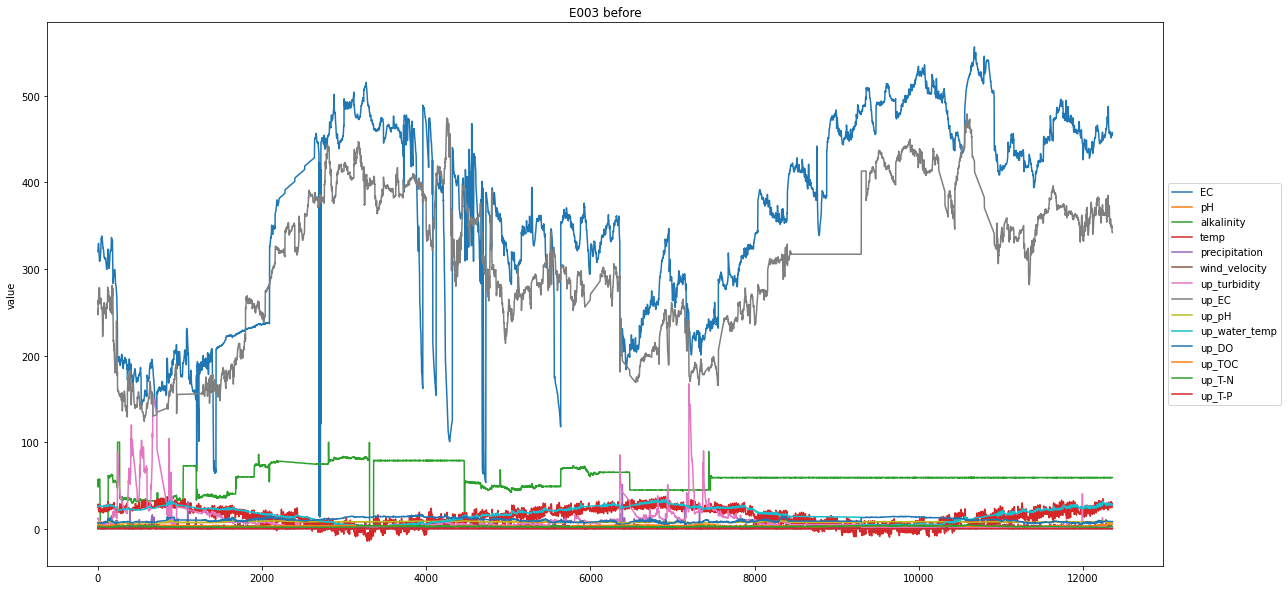

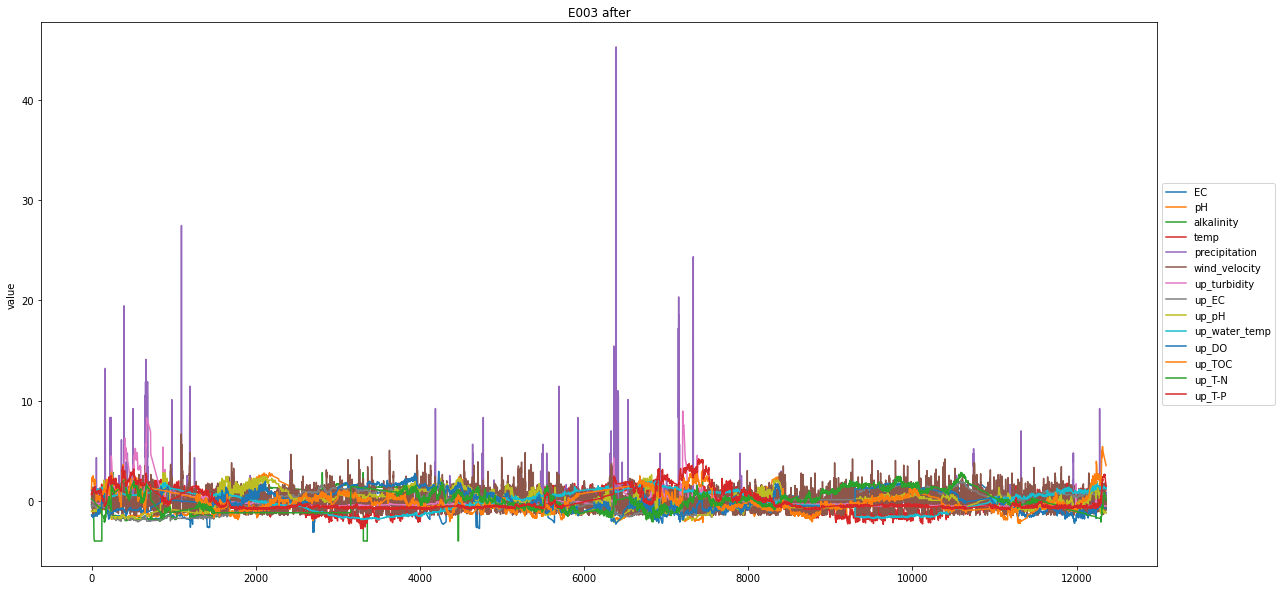

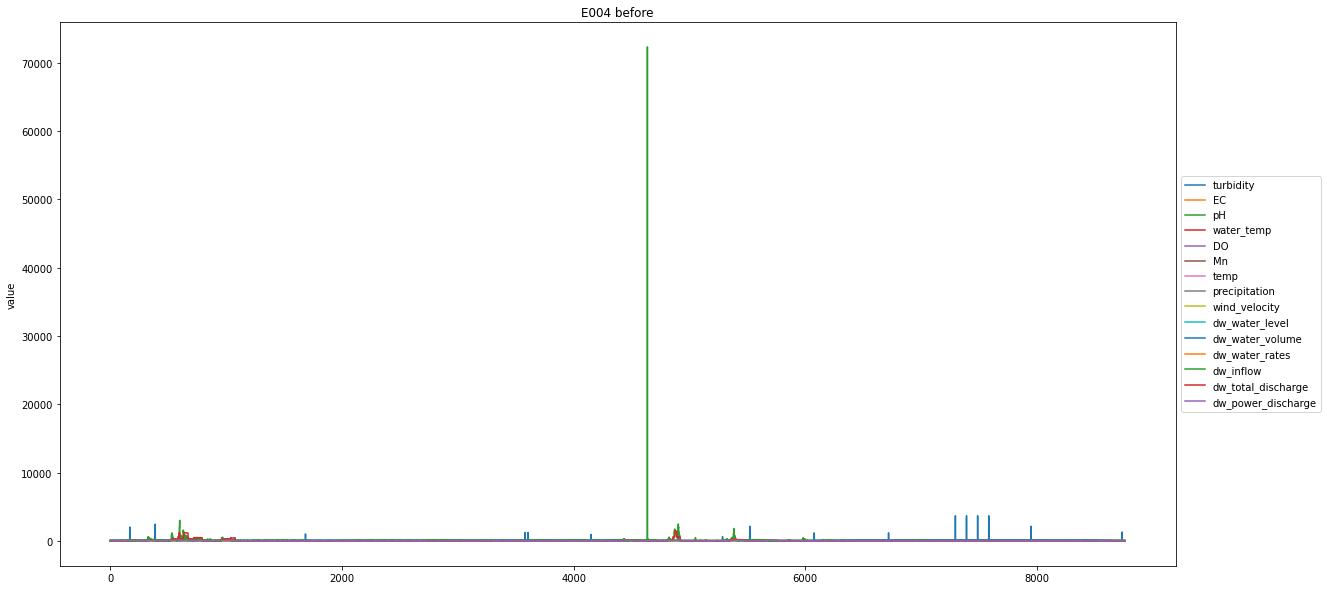

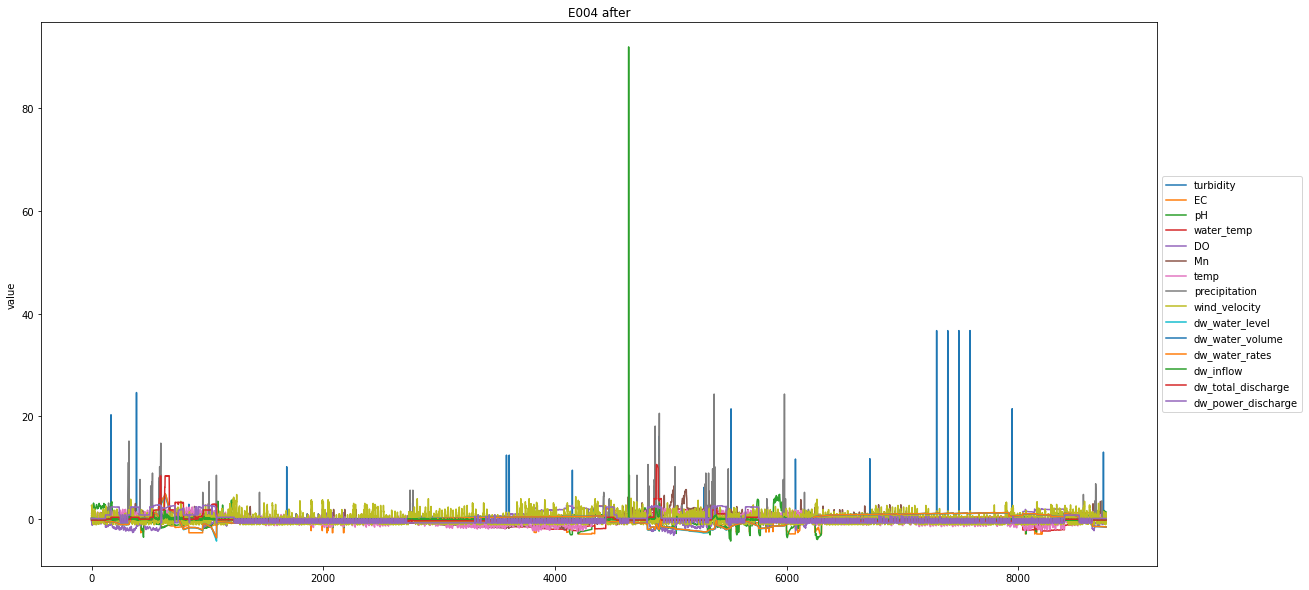

In [12]:
for dir in dir_list:
    data_list = sorted(glob(os.path.join(root_path, dir, "csv/*.csv")))

    df_raw = pd.DataFrame()
    for file in data_list:
        df_ = pd.read_csv(file)
        df_raw = pd.concat([df_raw, df_], axis=0, ignore_index=True)
    num_cols = list(df_raw.select_dtypes(include=np.number).columns)

    label_list = sorted(glob(os.path.join(root_path, dir, "hw3_json/*.json")))

    target_vals = []
    for js in label_list:
        with open(js, 'r') as f:
            label = json.load(f)
        input_cols = label['h']['input_serial'].split(',')
        target_cols = [k for k,v in label['w'].items() if(v is not None) & (k in num_cols) or (k == "measure_date")]
        vals = [label['w'][k] for k in target_cols]
        target_vals.append(vals)
    target_vals = np.array(target_vals)

    num_cols.append("measure_date")

    input = df_raw[num_cols]

    # drop empty columns
    clean_input = input.copy()
    clean_input.dropna(axis=1, how="all", inplace=True)

    # 한번만!
    clean_input['measure_date'] = clean_input['measure_date'].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))

    # lineplot
    n_cols = list(clean_input.select_dtypes(include=np.number).columns)

    # 정규화 전
    plt.figure(figsize=(20, 10))
    for col in n_cols:
        sns.lineplot(x=clean_input.index, y=col, data=clean_input)
    plt.legend(labels=n_cols, loc="center left", bbox_to_anchor=(1,0.5))
    plt.title(f"{dir[:4]} before")
    plt.ylabel("value")
    plt.show()

    # 정규화
    clean_input_reg = clean_input.copy()
    clean_input_reg[n_cols] = StandardScaler().fit_transform(clean_input_reg[n_cols])

    # 정규화 후
    plt.figure(figsize=(20, 10))
    for col in n_cols:
        sns.lineplot(x=clean_input_reg.index, y=col, data=clean_input_reg)
    plt.legend(labels=n_cols, loc="center left", bbox_to_anchor=(1,0.5))
    plt.title(f"{dir[:4]} after")
    plt.ylabel("value")
    plt.show()

KeyError: ignored

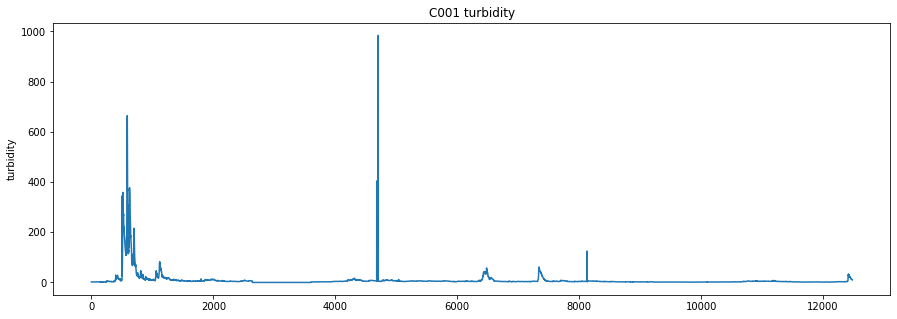

In [13]:
from google.colab import files

img_path = "_figures/"

for dir in dir_list:
    data_list = sorted(glob(os.path.join(root_path, dir, "csv/*.csv")))

    df_raw = pd.DataFrame()
    for file in data_list:
        df_ = pd.read_csv(file)
        df_raw = pd.concat([df_raw, df_], axis=0, ignore_index=True)
    num_cols = list(df_raw.select_dtypes(include=np.number).columns)
   


    input = df_raw[num_cols]

    clean_input = input.copy()
    clean_input.dropna(axis=1, inplace=True)

    for col in clean_input.columns:
        plt.title(f"{dir[:4]} {col}")
        plt.ylabel(col)

        clean_input[col].plot(figsize=(15,5))

        # Fit a polynomial regression model to the data
        coeffs = np.polyfit(clean_input[col].index, clean_input[col], 1)

        # plot trend line
        plt.plot(clean_input[col].index, coeffs[0] * clean_input[col].index + clean_input[1], '-r')

        plt.show()

## Trend line

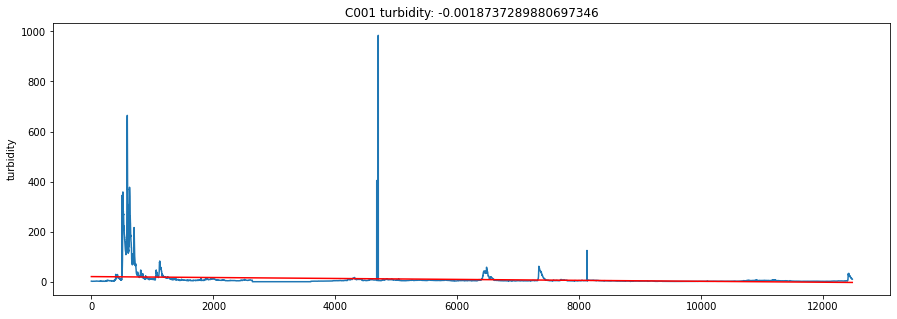

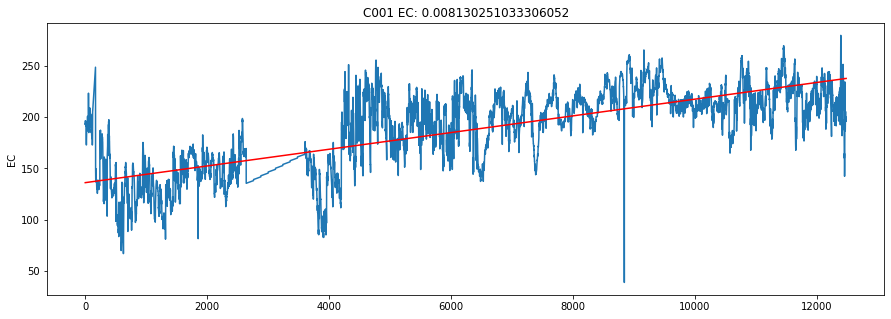

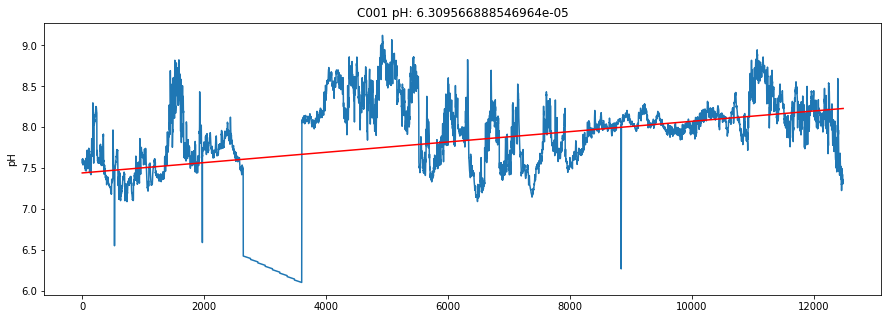

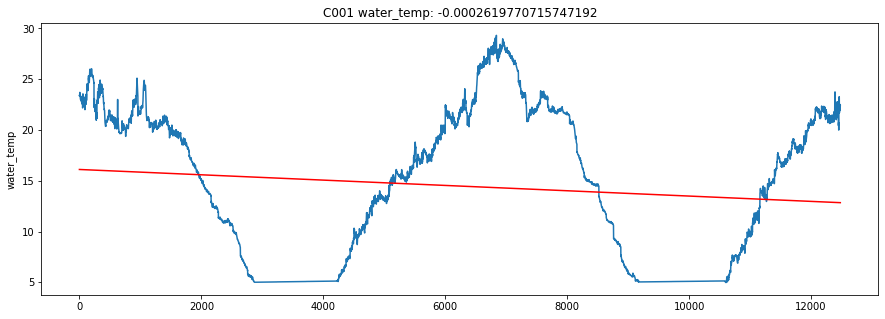

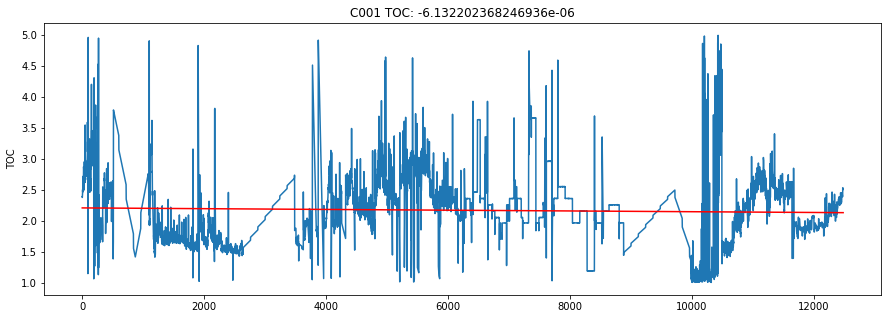

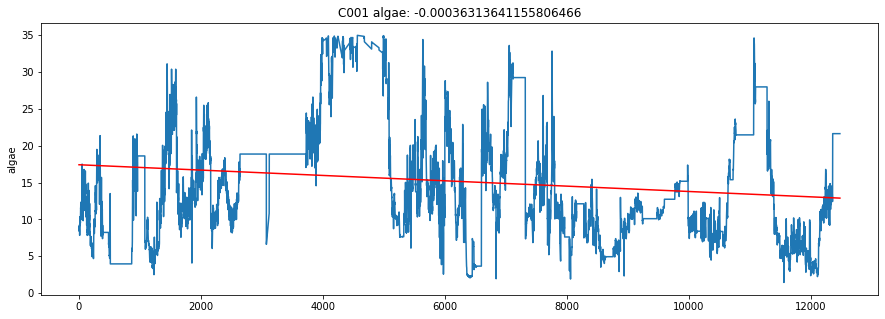

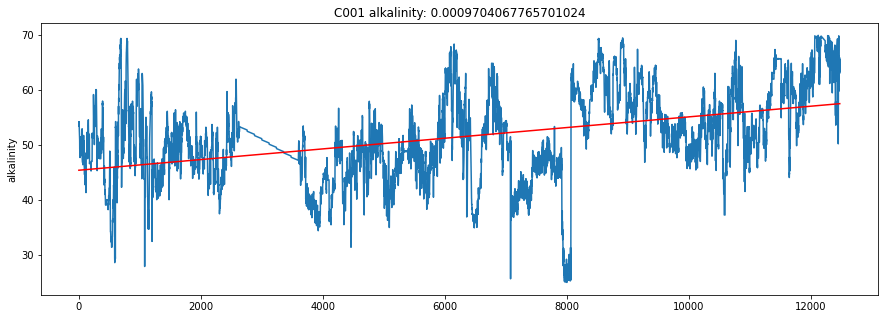

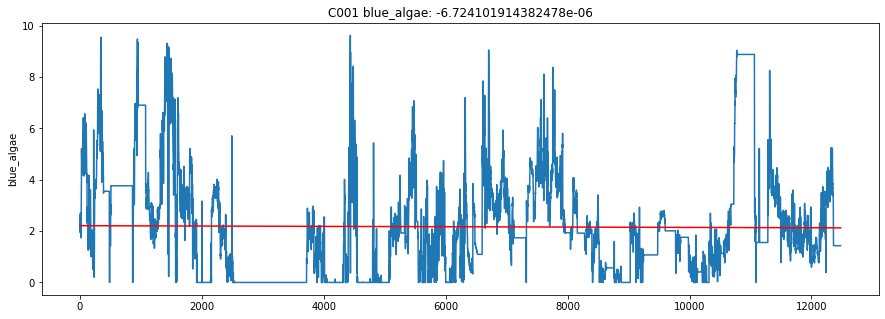

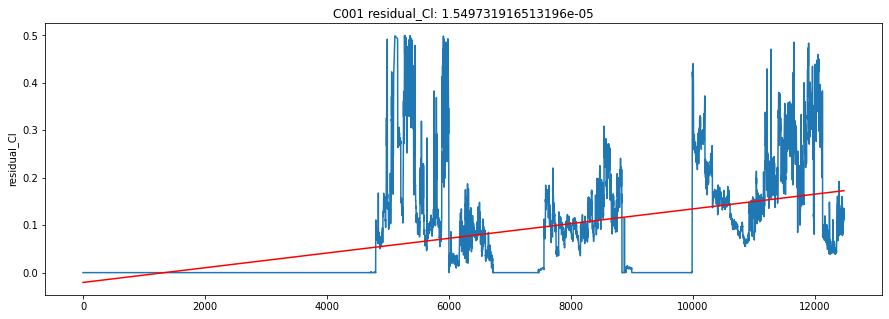

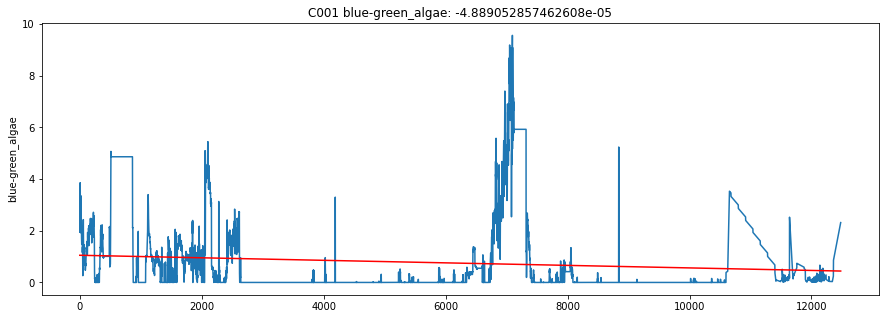

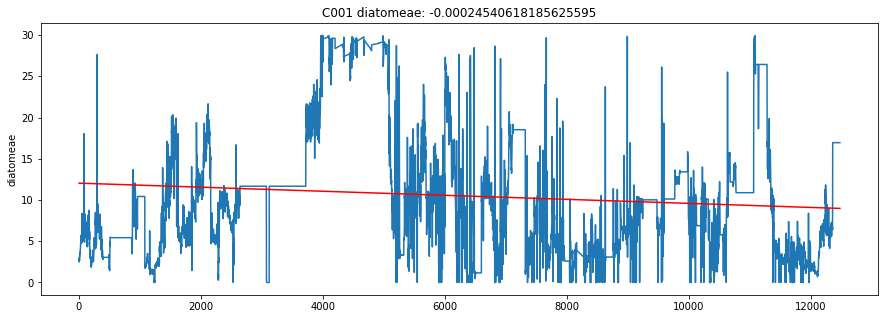

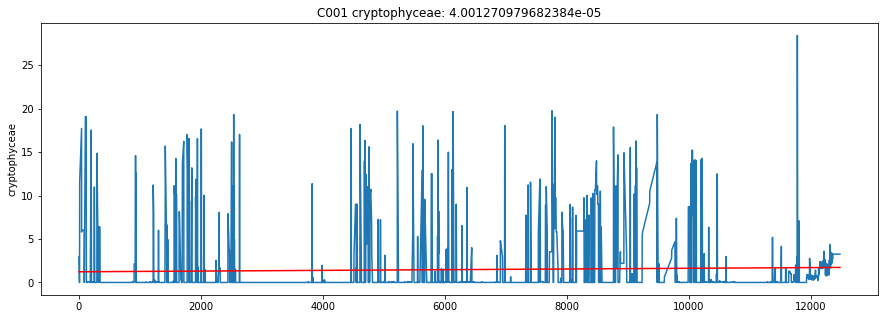

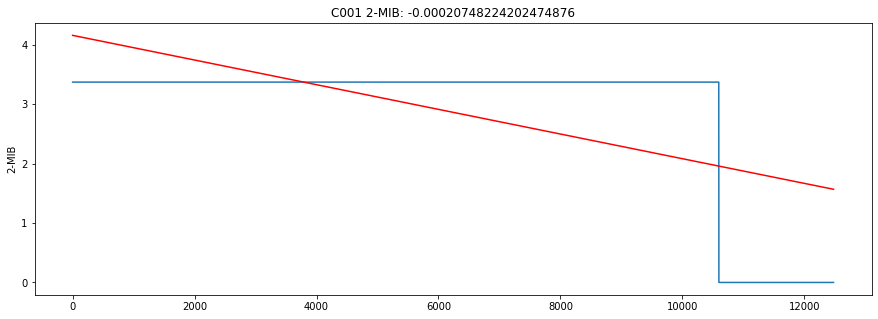

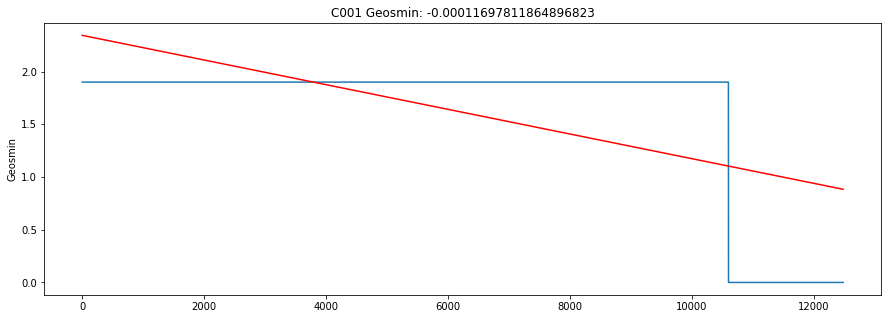

In [14]:

data_list = sorted(glob(os.path.join(root_path, dir_list[0], "csv/*.csv")))

df_raw = pd.DataFrame()
for file in data_list:
    df_ = pd.read_csv(file)
    df_raw = pd.concat([df_raw, df_], axis=0, ignore_index=True)
num_cols = list(df_raw.select_dtypes(include=np.number).columns)



input = df_raw[num_cols]

clean_input = input.copy()
clean_input.dropna(axis=1, inplace=True)

for col in clean_input.columns:
    plt.title(f"{dir[:4]} {col}")
    plt.ylabel(col)

    clean_input[col].plot(figsize=(15,5))

    # Fit a polynomial regression model to the data
    coeffs = np.polyfit(clean_input[col].index, clean_input[col], deg=1)

    # plot trend line
    plt.plot(clean_input[col].index, coeffs[0] * clean_input[col].index + coeffs[1], '-r')

    # moving average calculation would take the average of the last 120 hours for each data point
    # window_size = 24 * 5 # recorded hourly for five days

    # calculate the moving average to use it as the trend component
    #trend = input[col].rolling(window=window_size).mean()

    # plt.title(f"{dir[:4]} {col}: {trend}")
    plt.title(f"{dir[:4]} {col}: {coeffs[0]}")

    plt.show()
    # print(f"{coeffs}")

## time series decomposition

In [15]:
data_list = sorted(glob(os.path.join(root_path, dir_list[0], "csv/*.csv")))

df_raw = pd.DataFrame()
for file in data_list:
    df_ = pd.read_csv(file)
    df_raw = pd.concat([df_raw, df_], axis=0, ignore_index=True)
num_cols = list(df_raw.select_dtypes(include=np.number).columns)

# meausre date 추가
# ignore_index=True로 하면 column_names가 소멸
input = pd.concat([df_raw[num_cols], df_raw["measure_date"]], axis=1, ignore_index=False)
input

,turbidity,EC,pH,water_temp,DO,TOC,algae,alkalinity,blue_algae,residual_Cl,blue-green_algae,diatomeae,cryptophyceae,2-MIB,Geosmin,synedra,T-N,T-P,Mn,measure_date
0,2.2008,193.1177,7.6042,23.3904,NaN,2.3865,8.8682,53.4656,2.3345,0.0000,2.310200,2.8921,2.931557,3.37,1.9,NaN,NaN,NaN,NaN,2020-07-01 11:00
1,2.0852,194.0833,7.5892,23.4112,NaN,2.3740,8.9812,54.2187,2.6477,0.0000,2.065700,2.7805,2.442964,3.37,1.9,NaN,NaN,NaN,NaN,2020-07-01 12:00
2,2.0365,195.8219,7.5783,23.3797,NaN,2.3901,8.9936,54.1364,2.6489,0.0000,1.941000,2.9252,1.954371,3.37,1.9,NaN,NaN,NaN,NaN,2020-07-01 13:00
3,1.9890,196.3896,7.5585,23.3742,NaN,2.4261,8.3909,54.2579,2.3763,0.0000,1.985800,2.6105,1.465779,3.37,1.9,NaN,NaN,NaN,NaN,2020-07-01 14:00
4,1.9677,193.4125,7.5741,23.5082,NaN,2.4320,8.6893,53.9158,2.5344,0.0000,2.681000,2.4893,0.977186,3.37,1.9,NaN,NaN,NaN,NaN,2020-07-01 15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,11.5745,198.4823,7.3491,22.2479,NaN,2.5245,21.6417,65.6820,1.4320,0.1109,2.266508,16.9541,3.255600,0.00,0.0,NaN,NaN,NaN,NaN,2022-06-27 6:00
12476,11.2090,195.6500,7.3219,22.0653,NaN,2.5009,21.6417,64.0374,1.4320,0.1150,2.278839,16.9541,3.255600,0.00,0.0,NaN,NaN,NaN,NaN,2022-06-27 7:00
12477,10.8058,197.4573,7.3272,22.1636,NaN,2.5007,21.6417,63.0709,1.4320,0.1249,2.291170,16.9541,3.255600,0.00,0.0,NaN,NaN,NaN,NaN,2022-06-27 8:00
12478,10.3736,199.2188,7.3615,22.4109,NaN,2.5010,21.6417,64.8951,1.4320,0.1360,2.303501,16.9541,3.255600,0.00,0.0,NaN,NaN,NaN,NaN,2022-06-27 9:00


In [16]:
input["measure_date"] = input["measure_date"].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))

In [17]:
dt_input = input.copy()
dt_input.set_index(dt_input["measure_date"], inplace=True)
dt_input.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12480 entries, 2020-07-01 11:00:00 to 2022-06-27 10:00:00
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   turbidity         12480 non-null  float64       
 1   EC                12480 non-null  float64       
 2   pH                12480 non-null  float64       
 3   water_temp        12480 non-null  float64       
 4   DO                0 non-null      float64       
 5   TOC               12480 non-null  float64       
 6   algae             12480 non-null  float64       
 7   alkalinity        12480 non-null  float64       
 8   blue_algae        12480 non-null  float64       
 9   residual_Cl       12480 non-null  float64       
 10  blue-green_algae  12480 non-null  float64       
 11  diatomeae         12480 non-null  float64       
 12  cryptophyceae     12480 non-null  float64       
 13  2-MIB             12480 non-null  float64

In [18]:
clean_input = dt_input.copy()
clean_input.dropna(axis=1, how="all", inplace=True)
clean_input.shape

(12480, 15)

<ipython-input-19-0f19aeec3e5c>:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = sm.tsa.seasonal_decompose(clean_input[col], model="additive", freq=24)


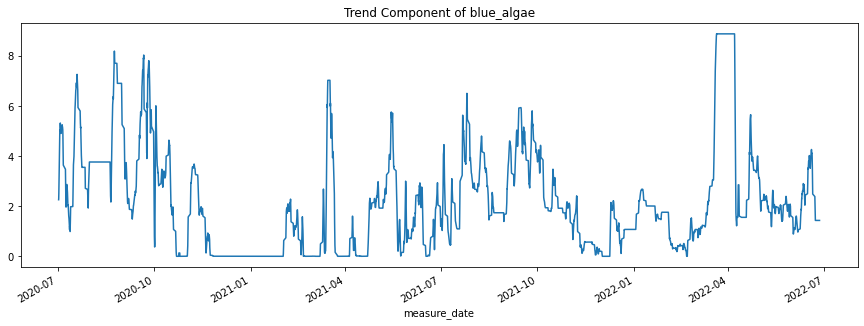

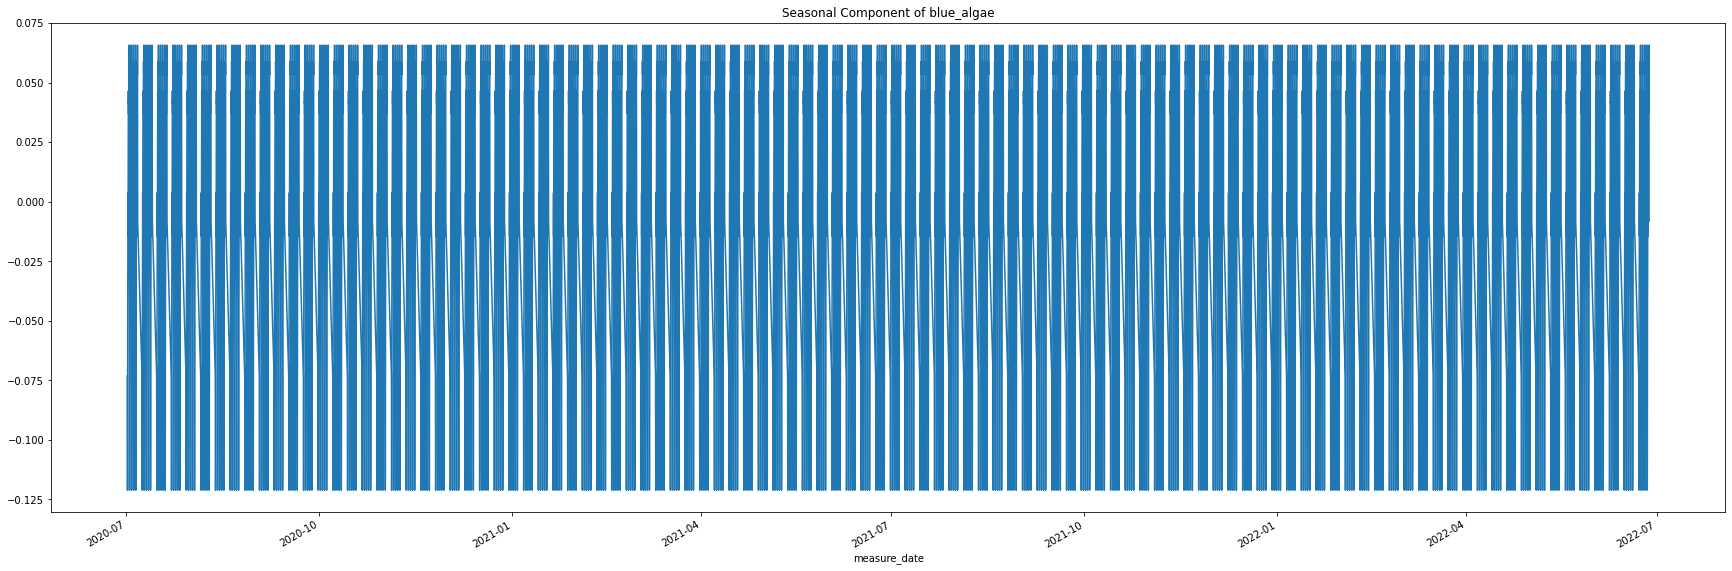

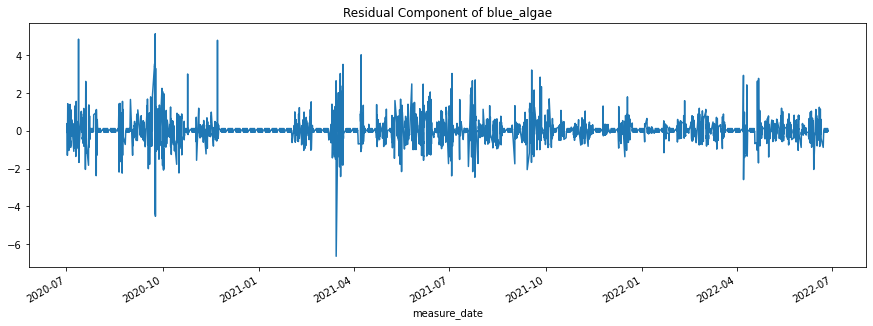

In [19]:
import statsmodels.api as sm

# x must be a pandas object with a DatetimeIndex with a freq not set to None
col = "blue_algae"
# for col in clean_
result = sm.tsa.seasonal_decompose(clean_input[col], model="additive", freq=24)

# Plot each component of the decomposition
plt.figure(figsize=(15,5))
result.trend.plot()
plt.title(f"Trend Component of {col}")
plt.show()

plt.figure(figsize=(30,10))
result.seasonal.plot()
plt.title(f"Seasonal Component of {col}")
plt.show()

plt.figure(figsize=(15,5))
result.resid.plot()
plt.title(f"Residual Component of {col}")
plt.show()

In [20]:
# len(total colum), len(usable column)

data_list = sorted(glob(os.path.join(root_path, dir_list[2], 'csv/*.csv')))

for file in data_list:
    data = pd.read_csv(file)
    if (len(data.dropna(axis=1).columns) != 7):
        print(f"{file} Total columns: {len(data.columns)}, Usable columns: {len(data.dropna(axis=1).columns)}")

dataset/Water_Week/D002구미/csv/AI-095-1_123_D002_h_20220620.csv Total columns: 21, Usable columns: 21
dataset/Water_Week/D002구미/csv/AI-095-1_123_D002_h_20220627.csv Total columns: 21, Usable columns: 21


In [21]:
data_list = sorted(glob(os.path.join(root_path, dir_list[0], 'csv/*.csv')))

for file in data_list:
    data = pd.read_csv(file)
    data_list = sorted(glob(os.path.join(root_path, dir_list[0], 'csv/*.csv')))

    if (len(data.columns) != 21 or len(data.dropna(axis=1).columns) != 7):
        print(f"{file} Total columns: {len(data.columns)}, Usable columns: {len(data.dropna(axis=1).columns)}")

dataset/Water_Week/C001팔당2취/csv/AI-095-1_123_C001_h_20200706.csv Total columns: 21, Usable columns: 16
dataset/Water_Week/C001팔당2취/csv/AI-095-1_123_C001_h_20200713.csv Total columns: 21, Usable columns: 16
dataset/Water_Week/C001팔당2취/csv/AI-095-1_123_C001_h_20200720.csv Total columns: 21, Usable columns: 16
dataset/Water_Week/C001팔당2취/csv/AI-095-1_123_C001_h_20200727.csv Total columns: 21, Usable columns: 16
dataset/Water_Week/C001팔당2취/csv/AI-095-1_123_C001_h_20200803.csv Total columns: 21, Usable columns: 16
dataset/Water_Week/C001팔당2취/csv/AI-095-1_123_C001_h_20200810.csv Total columns: 21, Usable columns: 16
dataset/Water_Week/C001팔당2취/csv/AI-095-1_123_C001_h_20200817.csv Total columns: 21, Usable columns: 16
dataset/Water_Week/C001팔당2취/csv/AI-095-1_123_C001_h_20200824.csv Total columns: 21, Usable columns: 16
dataset/Water_Week/C001팔당2취/csv/AI-095-1_123_C001_h_20200831.csv Total columns: 21, Usable columns: 16
dataset/Water_Week/C001팔다

In [22]:
data_list = sorted(glob(os.path.join(root_path, dir_list[3], 'csv/*.csv')))

for file in data_list:
    data = pd.read_csv(file)
    data_list = sorted(glob(os.path.join(root_path, dir_list[3], 'csv/*.csv')))

    if (len(data.columns) != 21 or len(data.dropna(axis=1).columns) != 8):
        print(f"{file} Total columns: {len(data.columns)}, Usable columns: {len(data.dropna(axis=1).columns)}")

In [23]:
data_list = sorted(glob(os.path.join(root_path, dir_list[4], 'csv/*.csv')))

for file in data_list:
    data = pd.read_csv(file)
    data_list = sorted(glob(os.path.join(root_path, dir_list[4], 'csv/*.csv')))

    if (len(data.columns) != 21 or len(data.dropna(axis=1).columns) != 8):
        print(f"{file} Total columns: {len(data.columns)}, Usable columns: {len(data.dropna(axis=1).columns)}")

In [24]:
data_list = sorted(glob(os.path.join(root_path, dir_list[5], 'csv/*.csv')))

for file in data_list:
    data = pd.read_csv(file)
    data_list = sorted(glob(os.path.join(root_path, dir_list[5], 'csv/*.csv')))

    if (len(data.columns) != 55 or len(data.dropna(axis=1).columns) != 16):
        print(f"{file} Total columns: {len(data.columns)}, Usable columns: {len(data.dropna(axis=1).columns)}")

In [25]:
data_list = sorted(glob(os.path.join(root_path, dir_list[6], 'csv/*.csv')))

for file in data_list:
    data = pd.read_csv(file)
    data_list = sorted(glob(os.path.join(root_path, dir_list[6], 'csv/*.csv')))

    if (len(data.columns) != 55 or len(data.dropna(axis=1).columns) != 17):
        print(f"{file} Total columns: {len(data.columns)}, Usable columns: {len(data.dropna(axis=1).columns)}")